In [16]:
from google.colab import files
files.upload()

Saving Mall.csv to Mall.csv


{'Mall.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female,20,37,75\

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
data = pd.read_csv("Mall.csv")
data

In [ ]:
new_data = data.iloc[:, [2,4]].values
new_data

In [ ]:
scaler = StandardScaler()
scaler.fit(new_data)
new_data

In [20]:
data2 = data.iloc[:, [1,2,4]].values
gender = data2[:,0]

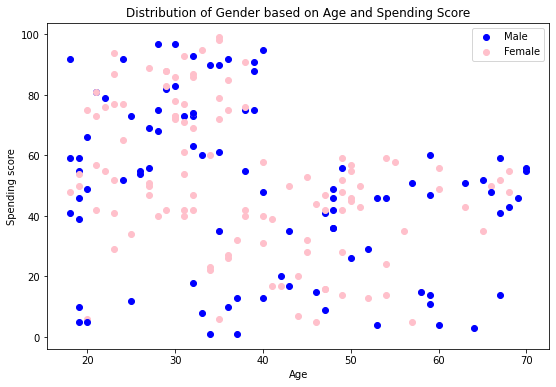

In [62]:
#Visualization
gender_color = ['b' if i == 'Male' else 'pink' for i in gender]
# gender_color
X = data2[:, 1] # Age
y = data2[:, 2] # Spending Score

a = ['Male', 'Female']
labels = []
for i in gender:
  if i in a:
    labels.append(i)
    a.remove(i)
  else:
    labels.append('')

plt.figure(figsize=(9, 6))
for i in range(0, len(X)):
  plt.scatter(X[i], y[i], c=gender_color[i], label=labels[i])

plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.title('Distribution of Gender based on Age and Spending Score')
plt.show()

In [64]:
# Elbow
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = np.array(list(zip(X, y))).reshape(len(X), 2)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [23]:
# Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 26.584293634469137
2 : 17.50414490737286
3 : 13.580800827443024
4 : 10.82166638302163
5 : 10.13563686959689
6 : 9.124824634581216
7 : 7.953136948663673
8 : 7.307409555069696
9 : 6.935034941387372


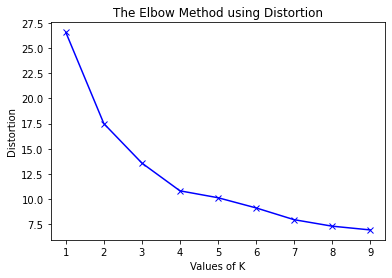

In [24]:
# Visualization
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [25]:
# Using the different values of Inertia:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 171535.50000000003
2 : 75949.15601023019
3 : 45840.67661610866
4 : 28165.583566629342
5 : 23818.84825158133
6 : 19492.611301496087
7 : 15523.684014328752
8 : 13085.60500877279
9 : 11449.271770824493


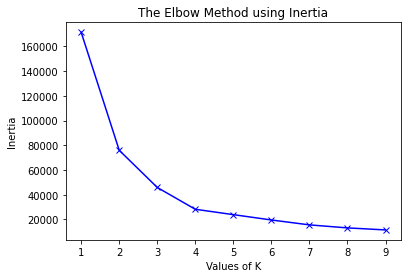

In [26]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
N = 50
original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.figure(figsize=(9, 6))
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6.5, alpha = .8, label='Usual Customers')
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6.5, alpha = .8, label='Young Customers')
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6.5, alpha = .8, label='Young targets')
    plt.plot(X3[:, 0], X3[:, 1], 'yv', markersize = 6.5, alpha = .8, label='Old targets')

    plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'Xc', markersize=15, alpha=.8)

    plt.axis('tight')
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Spending score (1-100)')
    plt.title('Customers Segmentation using Age and Spending Score')
    plt.show()
    
kmeans_display(X, original_label)

Centers found by scikit-learn:
[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


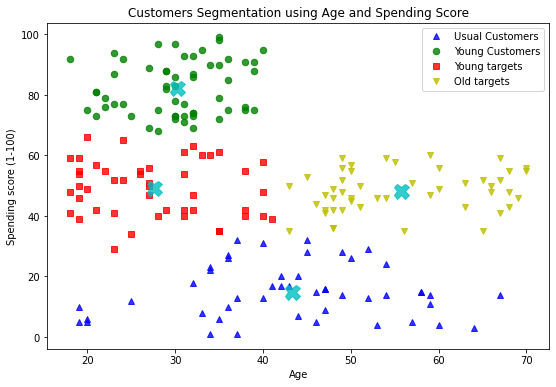

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)